# Adaline

In this notebook, we implement Adaline network for separation on wine dataset.

## Data

### Importing:
- load_wine: To load the Wine dataset.
- pandas: So that we can work with DataFrames.
- numpy: To use numpy arrays and functions.

In [130]:
# Import libraries
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

First of all, we load the Data using `load_wine()` function imported from `sklearn.datasets`. 

- As we can see, there are several informations contained in loaded data. Some of most important of them are:
    1. The data itself.
    2. Targets: The desired labels.
    3. feature_names.

- So as we can see there are 3 kind of wines in this dataset determined and classified using various features.
- There are **178** samples in this dataset.
- For each of these samples, there is 13 features such as:
    1. alcohol
    2. malic_acid
    3. etc...

In [131]:
# Load the Wine data
data = load_wine()
print(f"The information about the data set that it contains:\n {list(data.keys())}\n")
print(f"The classes of wines in data set:\n {data['target_names']}\n")
print(f"The features in data set:\n {data['feature_names']}")
print(f"\nThese information also contained in:\n{data['DESCR']}")

The information about the data set that it contains:
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

The classes of wines in data set:
 ['class_0' 'class_1' 'class_2']

The features in data set:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

These information also contained in:
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
      

So we construct a DataFrame to store the Wine dataset, using the provided data.
- 178 samples in 13 features.

In [132]:
# Construct a DataFrame of this data
wine_df = pd.DataFrame(data = data['data'], columns=data['feature_names'])
wine_df['target'] = data['target']

print(f"So, in summary, number of the samples contained in Wine data set is: {wine_df.shape[0]}\nAnd the number of features is: {wine_df.shape[1]-1}")
print('-'*75, end='\n')

wine_df.head(5)

So, in summary, number of the samples contained in Wine data set is: 178
And the number of features is: 13
---------------------------------------------------------------------------


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Normalization

- To use this data and train an Adaline model, we need to normalize the data.
- As we know, Adaline assumes that the provided data is 0 centered.
- So we use `StandardScaler` to normalize the data with mean 0 and variance 1.
- To do this:
    1. First we set a scaler.
    2. The using `fit_transform()`, normalize the data.

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()
# Nomalize the features in dataset
wine_df.iloc[:, :-1] = scaler.fit_transform(wine_df.iloc[:, :-1])

wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


## Scatter plot

To display the scatter plot of the provided dataset, we use `matplotlib.pyplot` as `plt`.

In [135]:
import matplotlib.pyplot as plt

There are two thing that this function do to display the scatter plot:
1. Display the provided points in dataset (with respect to given features)
2. If there is any separator provided, display that separator.

In [136]:
def display_scatter_separators(data, features, separators=[]):
    plt.figure(figsize=(8, 6))
    # The points in dataset with respect to given features for each label
    for label in range(len(data['target'].unique())) :
        plt.scatter(data[data['target'] == label][features[0]],
                    data[data['target'] == label][features[1]],
                    label=f"class_{label}")
    
    # In case there is a line provided
    if separators != []:
        i = 0
        for separator in separators:
            # Find the weights with respect to given features
            w1 = separator[0]
            w2 = separator[1]
            b = separator[-1]
            
            # Find the line and draw it
            x_min = min(data[data['target'] == i][features[0]])
            x_max = max(data[data['target'] == i][features[0]])
            
            x_values = np.linspace(x_min, x_max, 2)
            y_values = (-w1 / w2) * x_values - (b / w2)
            plt.plot(x_values, y_values, label=f'Separating Line {i}')
            i += 1
        
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f"Scatter plot of Wine dataset: {features[0]} vs. {features[1]} and the separators", fontsize=10)
    plt.legend()
    plt.grid(True)
    plt.show()

So this is the scatter plot of the dataset with repect to features `'alcohol'` and `'malic_acid'`.
- As we can see they are not well separatable.

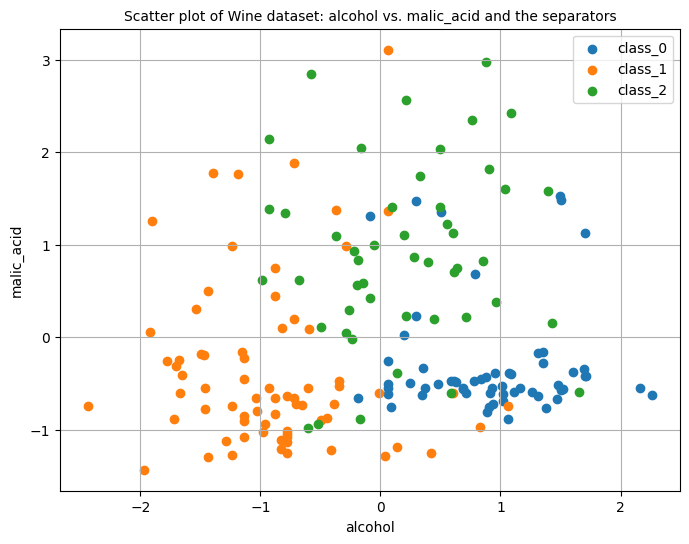

In [137]:
display_scatter_separators(wine_df, ['alcohol', 'malic_acid'])

## Adaline

This is the class emplementing Adaline model.
- There are *n_input* number of neurons in input layer.
- As Adaline is used and designed for two class classification, there is only one neuron in output.
- An instance of the model consists of:
    1. trained (random at first) weights connecting each input to output.
    2. trained (random at first) bias.

- This class containes of these functions:
    1. activation: The activation function for output layer:
        $$f(net) = \begin{cases} +1 & net \ge 0 \\ -1 & net < 0 \end{cases}$$
    2. calc_net: This function is used to apply the input and calculate the net for output neuron.
        $$ net = \sum_{i = 1}^{n\_inputs} x_iw_i + b$$
    3. predict: It uses calc_net and activation function to predict the label.
        $$ predicted\; label = f(net)$$
    4. update_weights: It updates the weights with respect to this formula:
        $$w_i^+ = w_i^- + \alpha(target - net)x_i$$
    5. update_bias: It updated the bias with respect to this formula for each input:
        $$b^+ = b^- + \alpha(target - net)$$
    6. It calculated the error using this formula:
        $$ error = \frac{1}{2}(target - net)^2 $$
    7. This function is used to train the network based on given train data, in specified number of epochs or achieve a certain treshold.
    
        7.1. while for each train data, the error is less than a treshold or certain number of epochs are passed:
        
        7.2. for each data, calculate the net.

        7.3. update weights and bias.

        7.4. The check the criterion for each data.
    
    The network is trained in this way.

In [138]:
class Adaline:
    
    def __init__(self, n_inputs):
        self.n_inputs = n_inputs
        # Random weights
        self.weights = np.random.randn(n_inputs) * 0.5
        # Random bias
        self.bias = np.random.randn(1)
    
    # Activation function for output neuron
    def activation(self, net):
        return 1 if net >= 0 else -1
    
    # Calculate the net to output neuron
    def calc_net(self, inputs):
        return np.dot(inputs, self.weights) + self.bias
    
    # Predict the output after the model is trained
    def predict(self, inputs):
        net = self.calc_net(inputs)
        return self.activation(net)
    
    # Update the weights with respect to the given formula
    def update_weights(self, inputs, target, learning_rate, net):
        diff = target - net
        self.weights += learning_rate * diff * inputs
        return
    
    # Update the bias with respect to the given formula
    def update_bias(self, inputs, target, learning_rate, net):
        diff = target - net
        self.bias += learning_rate * diff
        return
    
    # Calculate the loss
    def calc_loss(self, target, net):
        return (1/2)*(target - net)**2
    
    # train the model using given train data
    def fit(self, X, y, learning_rate, treshold, n_epochs=10000):
        mean_losses = []
        not_trained_yet = 1
        epoch = 1

        while not_trained_yet and epoch <= n_epochs:
            
            # Update the model
            for x, target in zip(X, y):
                
                net = self.calc_net(x)[0]
                
                self.update_weights(x, target, learning_rate, net)
                self.update_bias(x, target, learning_rate, net)
            
            sum_loss = 0
            not_trained_yet = 0
            for x, target in zip(X, y):
                
                net = self.calc_net(x)[0]   
                loss = self.calc_loss(target, net)
                sum_loss += loss

                # Check for the criterion
                if loss >= treshold:
                    not_trained_yet = 1
                    
            mean_losses.append(sum_loss/len(y))
                    
            print(f"epoch: {epoch}, epoch's mean loss: {np.round(mean_losses[-1], 5)}", end='\r', flush=True)
            epoch += 1
            
        return mean_losses

## Train for first two features

- `train_test_split` is used to partition the given data.
- Set the seed to *42* so that the results won't be different while executing the code on different executions.

In [139]:
from sklearn.model_selection import train_test_split
# Set seed to 42
np.random.seed(42)

### Class 0

Change the dataset so that the target is +1 for class 0 and -1 for None class 0.
$$target = \begin{cases} +1 & target \in class\_0 \\ -1 & target \in none\_class\_0 \end{cases}$$
Now it is ready to train an Adaline network to separate class 0 and none class 0 with two features `alcohol` and `malic_acid`.

In [140]:
# Get the input part of data
X_0 = wine_df[['alcohol', 'malic_acid']].values

# Get the output part of data
y_0 = wine_df[['target']].values.reshape(-1)
# Change the target of none class 0 to -1
y_0[y_0 != 0] = -1
# Change the target of class 0 to 1
y_0[y_0 == 0] = 1

y_0

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

- First of all paritition the data to train and test sets.
- The create an instance of Adaline network with 2 (two features) neurons as input neurons.
- The fit the model with:
    - learning rate = 0.001
    - treshold = 0.01
    - number of epochs = 100

In [141]:
# Split the data to train and test sets
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.2, random_state=42)
# Create an instance of Adaline network
adaline_0 = Adaline(2)
# Fit the model using train set
loss_history_0 = adaline_0.fit(X_train_0, y_train_0, 1e-3, 1e-2, 100)

As we can see, the trained model predictes the test set with accuracy 97.75%.

In [142]:
false_predicted_0 = 0
for sample, target in zip(X_test_0, y_test_0):
    pred = adaline_0.predict(sample)
    # If the prediction is not right
    if pred != target: false_predicted_0 += 1
    
print(f"The final accuracy for test set is: {np.round((1 - false_predicted_0/wine_df.shape[0])*100, 2)}%")

The final accuracy for test set is: 97.75%


As we can see, the trained model predictes the train set with accuracy 87.64%.

In [143]:
false_predicted_0 = 0
for sample, target in zip(X_train_0, y_train_0):
    pred = adaline_0.predict(sample)
    # If the prediction is not right
    if pred != target: false_predicted_0 += 1
    
print(f"The final accuracy for train set is: {np.round((1 - false_predicted_0/wine_df.shape[0])*100, 2)}%")

The final accuracy for train set is: 87.64%


This is the plot representing the decreasing flow of mean losses when training the model.

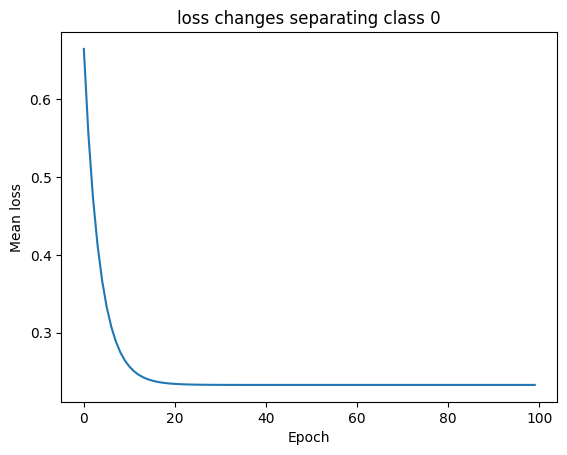

In [144]:
# Create a line plot
plt.plot(range(len(loss_history_0)), loss_history_0)

# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean loss')
plt.title('loss changes separating class 0')

# Show plot
plt.show()

### Class 1

Change the dataset so that the target is +1 for class 1 and -1 for None class 1.
$$target = \begin{cases} +1 & target \in class\_1 \\ -1 & target \in none\_class\_1 \end{cases}$$
Now it is ready to train an Adaline network to separate class 1 and none class 1 with features `alcohol` and `malic_acid`.

In [145]:
# Get the input part of data
X_1 = wine_df[['alcohol', 'malic_acid']].values

# Get the output part of data
y_1 = wine_df[['target']].values.reshape(-1)
# Change the target of none class 0 to -1
y_1[y_1 != 1] = -1
# Change the target of class 0 to 1
y_1[y_1 == 1] = 1

y_1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

- First of all paritition the data to train and test sets.
- The create an instance of Adaline network with 2 (number of features) neurons as input neurons.
- The fit the model with:
    - learning rate = 0.001
    - treshold = 0.01
    - number of epochs = 100

In [146]:
# Split the data to train and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
# Create an instance of Adaline network
adaline_1 = Adaline(2)
# Fit the model using train set
loss_history_1 = adaline_1.fit(X_train_1, y_train_1, 1e-3, 1e-2, 100)

As we can see, the trained model predictes the test set with accuracy 98.88%.

In [147]:
false_predicted_1 = 0
for sample, target in zip(X_test_1, y_test_1):
    pred = adaline_1.predict(sample)
    # If it is not predicted correctly
    if pred != target: false_predicted_1 += 1
    
print(f"The final accuracy for test set is: {np.round((1 - false_predicted_1/wine_df.shape[0])*100, 2)}%")

The final accuracy for test set is: 98.88%


As we can see, the trained model predictes the train set with accuracy 89.89%.

- So this model is separating the class 1 and none class 1 better than the first network separating class 0 and none class 0.
- It might be because of that class 2 and class 0 are not well separable.

In [148]:
false_predicted_1 = 0
for sample, target in zip(X_train_1, y_train_1):
    pred = adaline_1.predict(sample)
    # If it is not predicted correctly
    if pred != target: false_predicted_1 += 1
    
print(f"The final accuracy for train set is: {np.round((1 - false_predicted_1/wine_df.shape[0])*100, 2)}%")

The final accuracy for train set is: 89.89%


This is the plot representing the decreasing flow of mean losses when training the model.

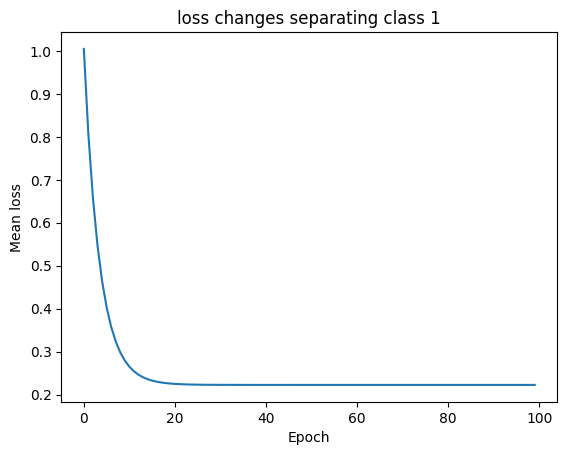

In [149]:
# Create a line plot
plt.plot(range(len(loss_history_1)), loss_history_1)

# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean loss')
plt.title('loss changes separating class 1')

# Show plot
plt.show()

- This is the data and calculated the separating lines (in 2 dimensions with respect to the given features).
- It is not showing the separation very well, cause there are still 11 more features to examine.

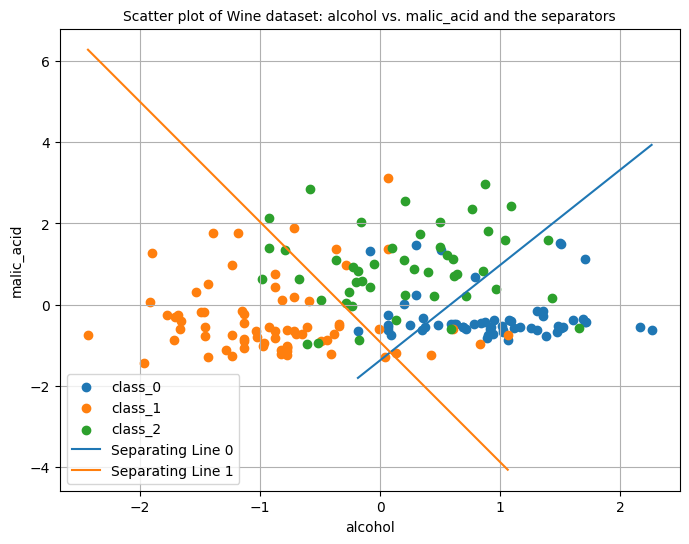

In [150]:
display_scatter_separators(wine_df, ['alcohol', 'malic_acid'],
                           [np.append(adaline_0.weights, adaline_0.bias), 
                            np.append(adaline_1.weights, adaline_1.bias)])

## Train for all features

Now we try training an Adaline model for all features.

In [151]:
# Get the input part of data
X_all_0 = wine_df.iloc[:, :-1].values

# Get the output part of data
y_all_0 = wine_df[['target']].values.reshape(-1)
# Change the target of none class 0 to -1
y_all_0[y_all_0 != 0] = -1
# Change the target of class 0 to 1
y_all_0[y_all_0 == 0] = 1

In [152]:
# Split the data to train and test sets
X_train_all_0, X_test_all_0, y_train_all_0, y_test_all_0 = train_test_split(X_all_0, y_all_0, test_size=0.2, random_state=42)
# Create an instance of Adaline network
adaline_all_0 = Adaline(13)
# Fit the model using train set
loss_history_all_0 = adaline_all_0.fit(X_train_all_0, y_train_all_0, 5e-5, 1e-2, 2500)

Accuracy 100 on test set

In [153]:
false_predicted_all_0 = 0
for sample, target in zip(X_test_all_0, y_test_all_0):
    pred = adaline_all_0.predict(sample)
    # If the prediction is not right
    if pred != target: false_predicted_all_0 += 1
    
print(f"The final accuracy for test set is: {np.round((1 - false_predicted_all_0/wine_df.shape[0])*100, 2)}%")

The final accuracy for test set is: 100.0%


Accuracy 100 on train set

In [154]:
false_predicted_all_0 = 0
for sample, target in zip(X_train_all_0, y_train_all_0):
    pred = adaline_all_0.predict(sample)
    # If the prediction is not right
    if pred != target: false_predicted_all_0 += 1
    
print(f"The final accuracy for train set is: {np.round((1 - false_predicted_all_0/wine_df.shape[0])*100, 2)}%")

The final accuracy for train set is: 100.0%


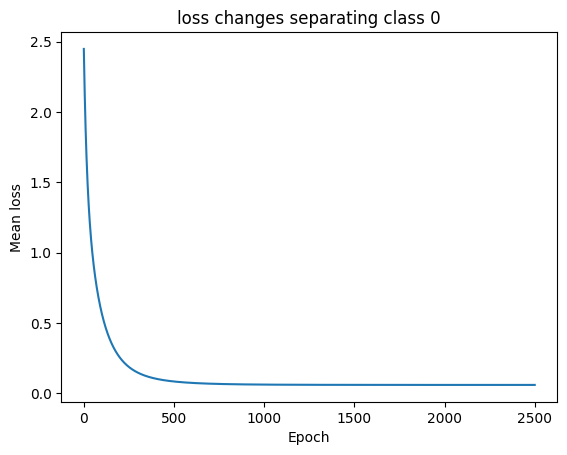

In [155]:
# Create a line plot
plt.plot(range(len(loss_history_all_0)), loss_history_all_0)

# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean loss')
plt.title('loss changes separating class 0')

# Show plot
plt.show()